In [2]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

['IR02;14', 'IR02;13']
['ADC', 'Sampling', 'EventNumber', 'TriggerTimeStamp', 'PCTimeStamp']


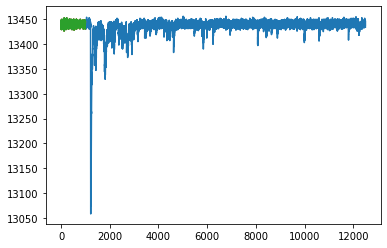

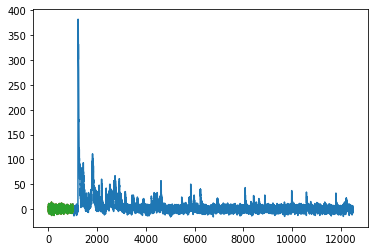

In [9]:
file=uproot.open("run22_ch1.root")
print(file.keys())
print(file["IR02"].keys())

# Remove pedestal
WVF=file["IR02"]["ADC"].array().to_numpy()
TTS=file["IR02"]["TriggerTimeStamp"].array().to_numpy()
EVN=file["IR02"]["EventNumber"].array().to_numpy()

ev=2;
PED_BINS=1000
plt.plot(WVF[ev])
plt.plot(WVF[ev,:1000])
plt.plot(WVF[ev,:PED_BINS])

PED=np.mean(WVF[:,:PED_BINS],axis=1)
WVF=-(WVF-PED[:, np.newaxis])
plt.figure()
plt.plot(WVF[ev])
plt.plot(WVF[ev,:1000])
plt.plot(WVF[ev,:PED_BINS])

AMP=np.max(WVF,axis=1)
T_AMP=np.argmax(WVF,axis=1)

In [10]:
CHARGE_100  =np.sum(WVF[:,1200:1250],axis=1)
CHARGE_TOTAL=np.sum(WVF[:,1200:],axis=1)
F_90        = CHARGE_100/CHARGE_TOTAL


In [11]:
%matplotlib qt

plt.figure()

plt.plot(AMP[ (AMP>80) ]                      ,F_90[ (AMP>80) ]                       ,'.',markersize=.1);
plt.plot(AMP[((AMP>80) & (CHARGE_TOTAL>1e4))] ,F_90[((AMP>80) & (CHARGE_TOTAL>1e4))]  ,'.',markersize=.1);
plt.plot(AMP[((AMP>80) & ~(CHARGE_TOTAL>1e4))],F_90[((AMP>80) & ~(CHARGE_TOTAL>1e4))] ,'.',markersize=.1);

plt.ylim([0,1])

(0.0, 1.0)

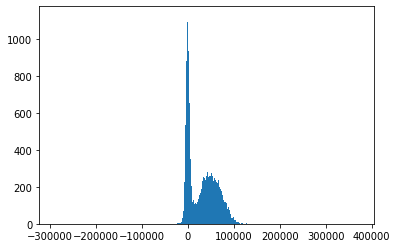

In [5]:
plt.figure()
plt.hist(CHARGE_TOTAL,1000);

Text(0, 0.5, 'cuentas')

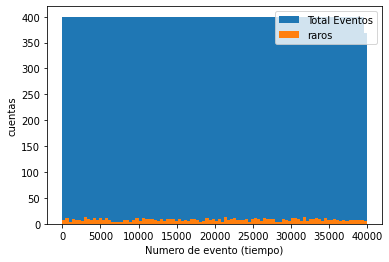

In [23]:
plt.hist(EVN                                  ,100,[0,40000]);
plt.hist(EVN[((AMP>80) & ~(CHARGE_TOTAL>1e4))],100,[0,40000]);

plt.legend(["Total Eventos","raros"]);
plt.xlabel("Numero de evento (tiempo)")
plt.ylabel("cuentas")
